In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/habermans-survival-data-set/haberman.csv


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
#Load the dataset
url = "/kaggle/input/habermans-survival-data-set/haberman.csv"
haberman = pd.read_csv(url)


In [5]:
#Shape of the dataset, number of points
print(haberman.shape)

(305, 4)


In [6]:
#No of columns
print(haberman.columns)

Index(['30', '64', '1', '1.1'], dtype='object')


In [7]:
#No column names has been mentioned so we will add our own column name
haberman.columns = ["Age","Yeal","Axil Node","Survival Status"]
print(haberman.columns)

Index(['Age', 'Yeal', 'Axil Node', 'Survival Status'], dtype='object')


In [8]:
#Head of the dataset
haberman.head()

,Age,Yeal,Axil Node,Survival Status
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1


In [9]:
#Value count of each dataset
haberman["Survival Status"].value_counts()


1    224
2     81
Name: Survival Status, dtype: int64

**Oberservation**

1. Imbalanced Dataset
2. 224 Patients survive more than five years, 81 patients died within 5 years


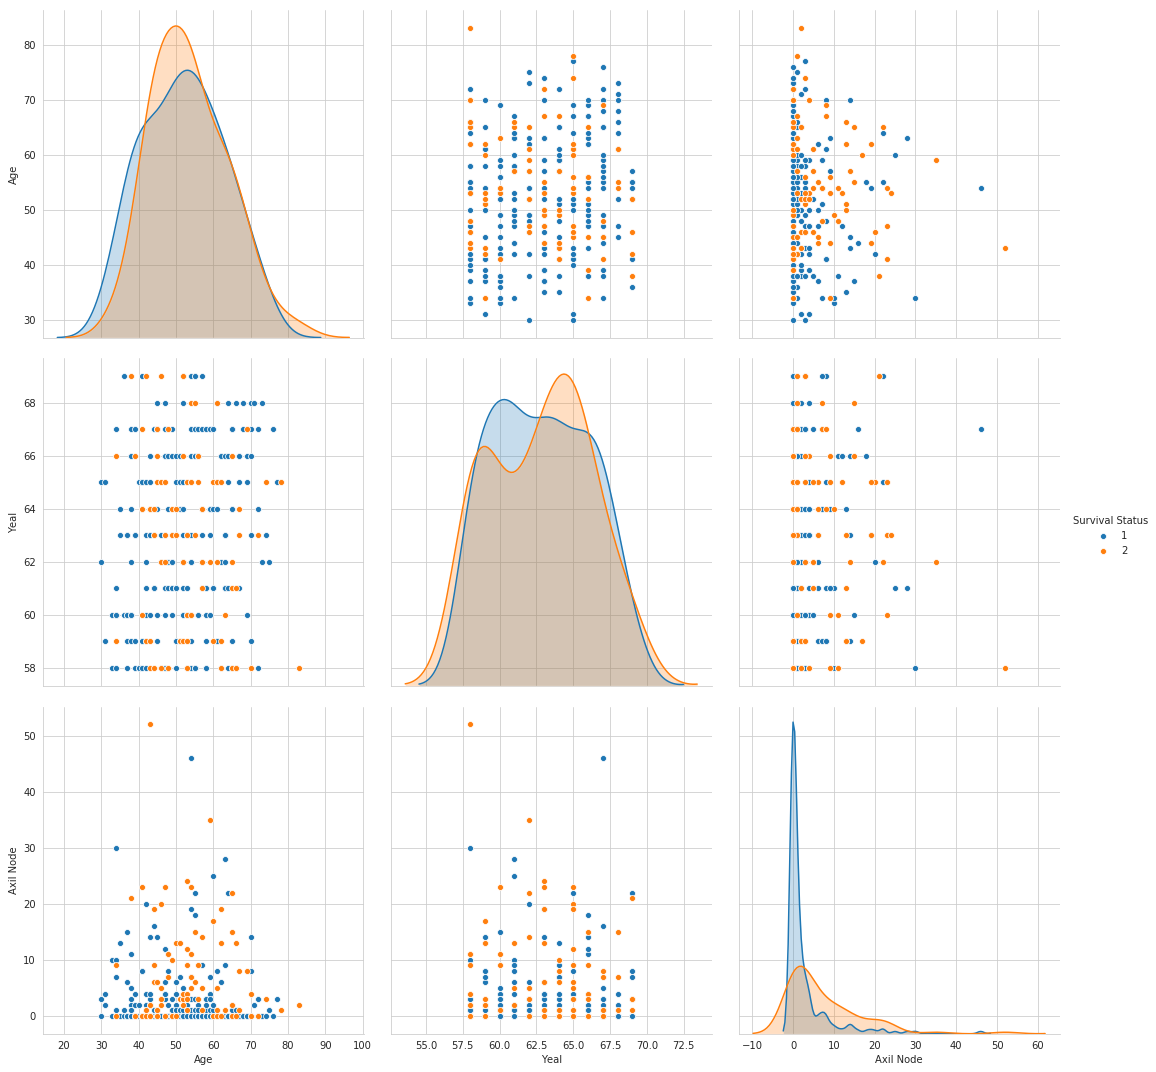

In [10]:
#pairploting the data
sns.set_style("whitegrid");
sns.pairplot(haberman,hue="Survival Status",vars=["Age","Yeal","Axil Node"], height = 5);
plt.show();

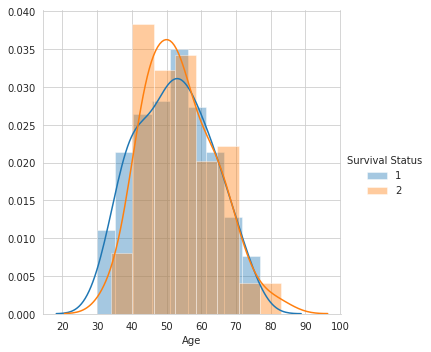

In [16]:
#Histogram / PDF of age
sns.FacetGrid(haberman,hue="Survival Status",height=5)\
    .map(sns.distplot, "Age") \
    .add_legend();
plt.show();

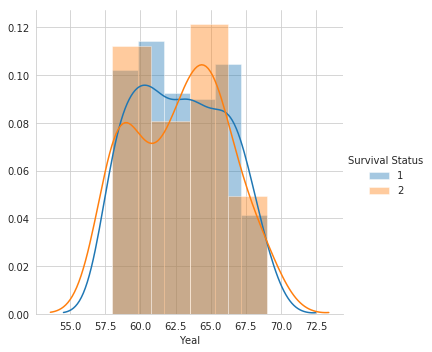

In [15]:
#Histogram / PDF of Year
sns.FacetGrid(haberman, hue="Survival Status", height= 5)\
    .map(sns.distplot, "Yeal") \
    .add_legend();
plt.show();

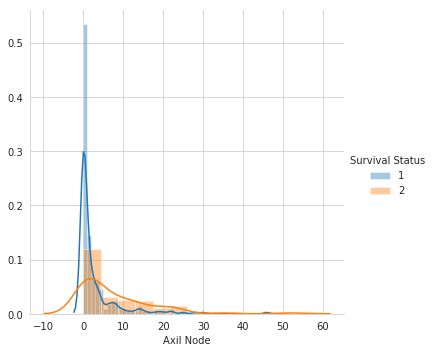

In [14]:
#Histogram / PDF of axil node
sns.FacetGrid(haberman,hue="Survival Status", height= 5)\
    .map(sns.distplot,"Axil Node")\
    .add_legend();
plt.show();

**Oberservation**

1.By looking at the all three features we can see that the Axil Node feature is the feature which is giving us some valaubale insight about the data


In [17]:
#Divide the dataset into two alive and dead
alive = haberman.loc[haberman["Survival Status"] == 1]
dead = haberman.loc[haberman["Survival Status"] == 2]

[0.66517857 0.125      0.04464286 0.02678571 0.02232143 0.03125
 0.00892857 0.00892857 0.00446429 0.01785714 0.00446429 0.00446429
 0.00446429 0.00446429 0.00892857 0.         0.00446429 0.
 0.00446429 0.00446429 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.00446429]
[ 0.          1.53333333  3.06666667  4.6         6.13333333  7.66666667
  9.2        10.73333333 12.26666667 13.8        15.33333333 16.86666667
 18.4        19.93333333 21.46666667 23.         24.53333333 26.06666667
 27.6        29.13333333 30.66666667 32.2        33.73333333 35.26666667
 36.8        38.33333333 39.86666667 41.4        42.93333333 44.46666667
 46.        ]


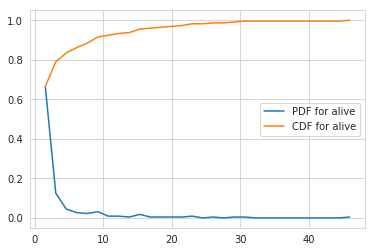

In [20]:
#CDF for Alive
counts, bin_edges = np.histogram(alive['Axil Node'], bins = 30, density = True)
pdf = counts/sum(counts)
print(pdf)
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
plt.legend(['PDF for alive','CDF for alive'])
plt.show()

[0.01785714 0.00892857 0.02232143 0.01785714 0.02678571 0.0625
 0.01339286 0.0625     0.04910714 0.02678571 0.04910714 0.01785714
 0.08035714 0.01785714 0.06696429 0.07589286 0.02232143 0.06696429
 0.03125    0.04464286 0.01785714 0.05357143 0.04017857 0.01785714
 0.02232143 0.02232143 0.01785714 0.00892857 0.00892857 0.00892857]
[30.         31.56666667 33.13333333 34.7        36.26666667 37.83333333
 39.4        40.96666667 42.53333333 44.1        45.66666667 47.23333333
 48.8        50.36666667 51.93333333 53.5        55.06666667 56.63333333
 58.2        59.76666667 61.33333333 62.9        64.46666667 66.03333333
 67.6        69.16666667 70.73333333 72.3        73.86666667 75.43333333
 77.        ]


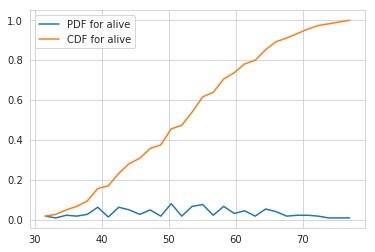

In [21]:
#CDF for Alive
counts, bin_edges = np.histogram(alive['Age'], bins = 30, density = True)
pdf = counts/sum(counts)
print(pdf)
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
plt.legend(['PDF for alive','CDF for alive'])
plt.show()

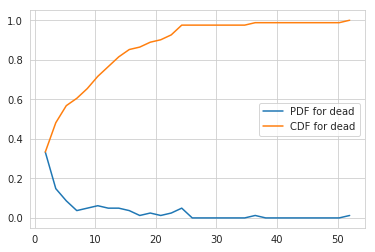

In [22]:
#CDF for dead
counts, bin_edges = np.histogram(dead['Axil Node'], bins = 30, density = True)

pdf= counts/sum(counts)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
plt.legend(['PDF for dead','CDF for dead'])
plt.show()

In [23]:
#Statistics of patients who are alive
alive.describe()

,Age,Yeal,Axil Node,Survival Status
count,224.000000,224.000000,224.000000,224.0
mean,52.116071,62.857143,2.799107,1.0
std,10.937446,3.229231,5.882237,0.0
min,30.000000,58.000000,0.000000,1.0
25%,43.000000,60.000000,0.000000,1.0
50%,52.000000,63.000000,0.000000,1.0
75%,60.000000,66.000000,3.000000,1.0
max,77.000000,69.000000,46.000000,1.0


In [24]:
#Statistics of patients who are dead
dead.describe()

,Age,Yeal,Axil Node,Survival Status
count,81.000000,81.000000,81.000000,81.0
mean,53.679012,62.827160,7.456790,2.0
std,10.167137,3.342118,9.185654,0.0
min,34.000000,58.000000,0.000000,2.0
25%,46.000000,59.000000,1.000000,2.0
50%,53.000000,63.000000,4.000000,2.0
75%,61.000000,65.000000,11.000000,2.0
max,83.000000,69.000000,52.000000,2.0


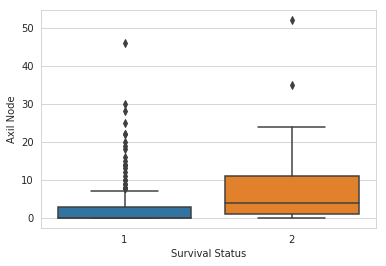

In [25]:
#Box Plot
sns.boxplot(x="Survival Status", y="Axil Node", data=haberman)
plt.show()

**Oberservation**

1. This box plot shows us that 50 percent of the patient that survived has axel node between range 0 to 2
2. 50 percent of the patient that did not survived had the axel node range between 1.5 to 10

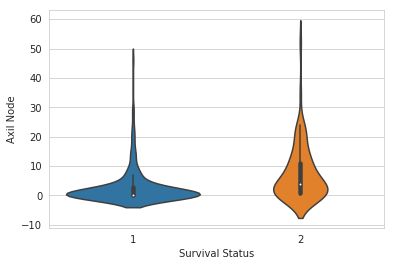

In [27]:
#Violin Plot
sns.violinplot(x="Survival Status", y ="Axil Node", data=haberman)

Violin plots are the combination of box plot and histogram.

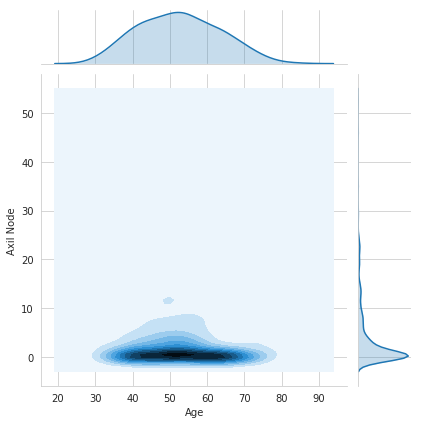

In [29]:
#Contour Plot
#Contour Plot help us analyze multiple variable and draw a pdf of those multi variable
sns.jointplot(x="Age", y="Axil Node", data = haberman, kind = "kde")
plt.show();